In [1]:
import numpy as np
import sys
import os
from dask.distributed import Client
import pandas as pd

sys.path.append(os.path.abspath('../../data_processing'))
from process_urls_dask import get_file_urls, process_urls_in_parallel
from utils_dask import plot_polar_data

# Set up the Dask client
# client = Client(n_workers=4, threads_per_worker=2, processes=True, memory_limit='4GB')

/home/as5023/ACSE/irp-as5023/data_processing/process_image_dask.py:144: SyntaxWarning: invalid escape sequence '\s'
  calib_data = pd.read_csv(tab_file, sep='\s+', header=None, names=["Channel", "Wavelength"])
/home/as5023/miniconda3/envs/IRP/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36447 instead
  warnings.warn(


In [2]:
# MiniRF_home = 'https://pds-geosciences.wustl.edu/lro/lro-l-mrflro-5-global-mosaic-v1/lromrf_1001/data/128ppd/'

# # Get and print all .lbl file URLs from the given page
# MiniRF_urls = get_file_urls(MiniRF_home, '.lbl', 'cpr') # 'cpr' - circular polarisation ratio
# print(f"Found {len(MiniRF_urls)} Mini-RF file(s)")

# MiniRF_df = process_urls_in_parallel(client, MiniRF_urls, 'MiniRF').compute()
# print("File(s) processed successfully")

Found 1 Mini-RF file(s)



KeyboardInterrupt: 

Number of NaNs in Mini-RF CPR data: 1772284 out of 3594240 (49.31%)
Min/max longitude: 205.6452, 334.3529
Min/max latitude: -90.0000, 90.0000
Min/max CPR val: 0.0000, 2.0000

          Longitude      Latitude        MiniRF
count  3.594240e+06  3.594240e+06  1.821956e+06
mean   2.699974e+02  3.774094e-04  4.754940e-01
std    4.478076e+01  8.266693e+01  2.720289e-01
min    2.056452e+02 -9.000000e+01  4.356416e-06
25%    2.244223e+02 -8.254865e+01  2.885055e-01
50%    2.699950e+02  7.171631e-04  4.139409e-01
75%    3.155727e+02  8.254939e+01  5.926292e-01
max    3.343529e+02  9.000000e+01  1.999955e+00


/home/as5023/miniconda3/envs/IRP/lib/python3.12/site-packages/distributed/client.py:3164: UserWarning: Sending large graph of size 34.76 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


Latitude range: 75.0987548828125 to 90.0
Second latitude: 75.0987548828125
Latitude range: -78.23471069335938 to -75.09732055664062
Second latitude: -78.23471069335938
Plotting 1821956 data points...


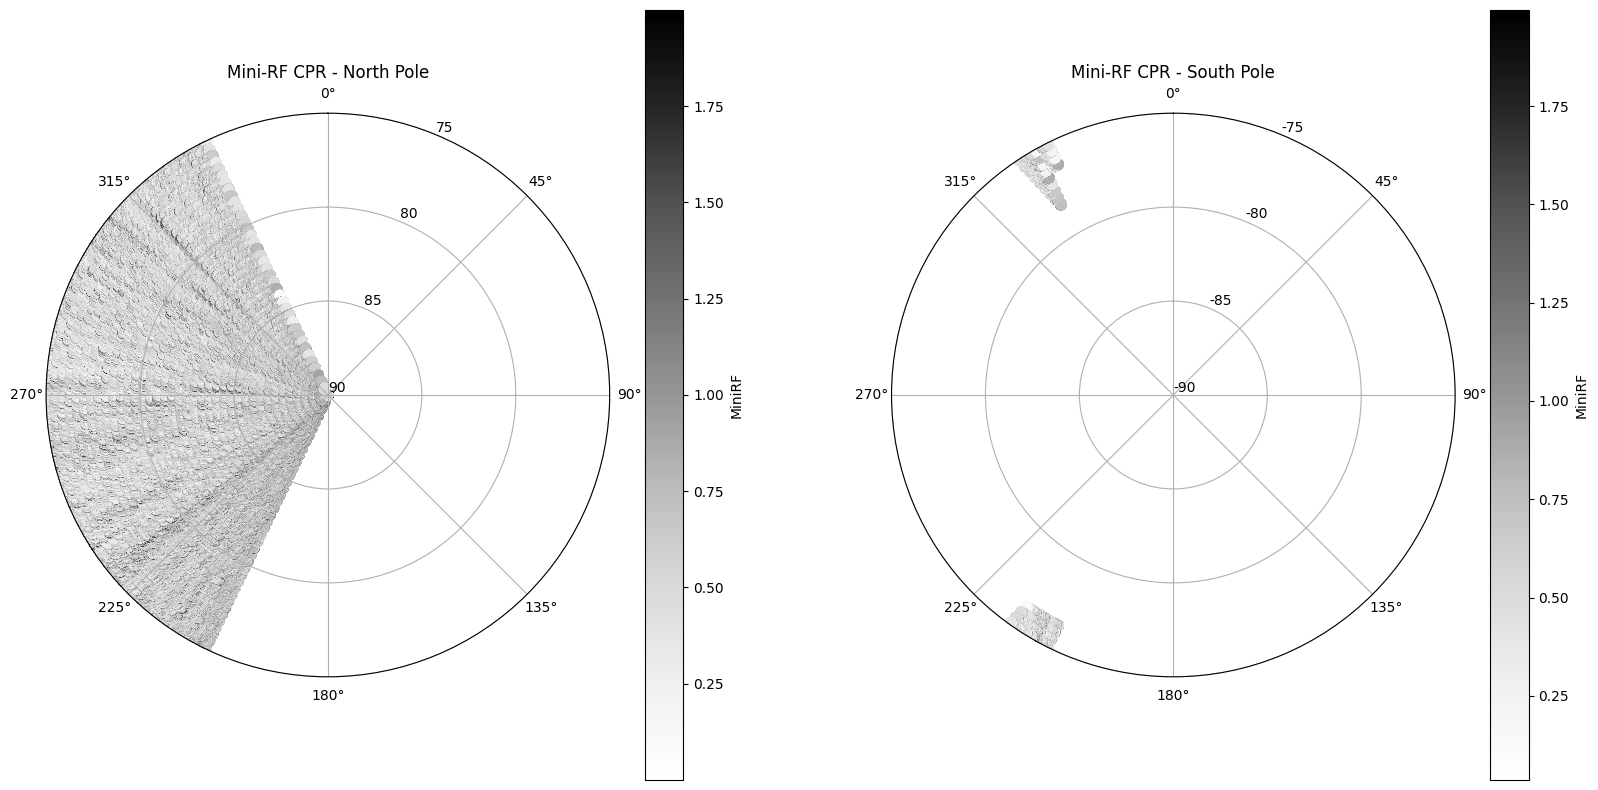

In [ ]:
# print(f"Number of NaNs in Mini-RF CPR data: {np.isnan(MiniRF_df["MiniRF"]).sum()} out of {np.prod(MiniRF_df["MiniRF"].shape)} ({(np.isnan(MiniRF_df["MiniRF"]).sum()/np.prod(MiniRF_df["MiniRF"].shape)*100):.2f}%)")

# print(f'Min/max longitude: {MiniRF_df["Longitude"].min():.4f}, {MiniRF_df["Longitude"].max():.4f}')
# print(f'Min/max latitude: {MiniRF_df["Latitude"].min():.4f}, {MiniRF_df["Latitude"].max():.4f}')
# print(f'Min/max CPR val: {MiniRF_df["MiniRF"].min():.4f}, {MiniRF_df["MiniRF"].max():.4f}\n')

# print(MiniRF_df.describe())

# plot_polar_data(MiniRF_df, 'MiniRF', frac=1, title_prefix='Mini-RF CPR')

# client.close()

In [ ]:
home_dir = './MiniRF_CSVs'
filenames = os.listdir(home_dir)
dfs = [pd.read_csv(os.path.join(home_dir, filename)) for filename in filenames]

for i in len(dfs):
    print(f'File: {filenames[i]}')
    dfs[i].head()
    print()